# Performance analysis

## Stock list

In [1]:
import pandas as pd

stock_list = pd.read_excel("data/stock_list.xlsx", index_col=0)
stock_list

,Exchange,Symbol,Industry,permno,Weight
Company,,,,,
Apple,NASDAQ,AAPL,Information technology,14593,0.0409
Amgen,NASDAQ,AMGN,Biopharmaceutical,14008,0.0000
Amazon,NASDAQ,AMZN,Retailing,84788,0.0000
American Express,NYSE,AXP,Financial services,59176,0.0418
Boeing,NYSE,BA,Aerospace and defense,19561,0.0223
Caterpillar,NYSE,CAT,Construction and mining,18542,0.0902
Salesforce,NYSE,CRM,Information technology,90215,0.0000
Cisco,NASDAQ,CSCO,Information technology,76076,0.0000
Chevron,NYSE,CVX,Petroleum industry,14541,0.1000


### Stock allocations

- No short selling allowed
- Maximum 10% of portfolio in a single stock

<Axes: ylabel='Weight'>

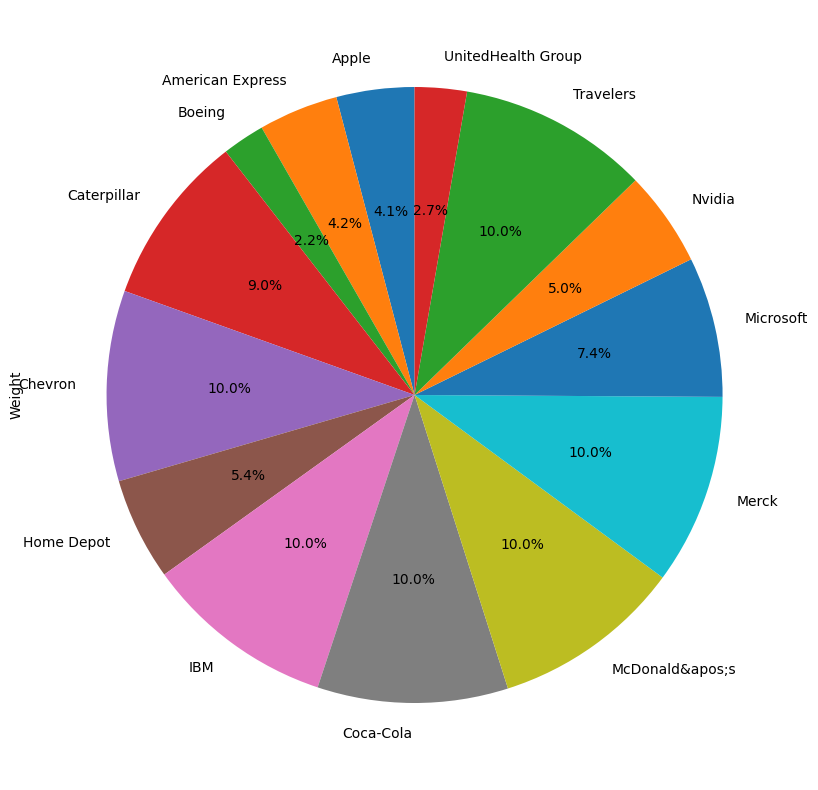

In [2]:
# weights of the portfolio - pie chart
weights = stock_list[stock_list['Weight'] > 0]["Weight"]
weights.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), startangle=90, legend=False)

### Industry allocations

<Axes: ylabel='Weight'>

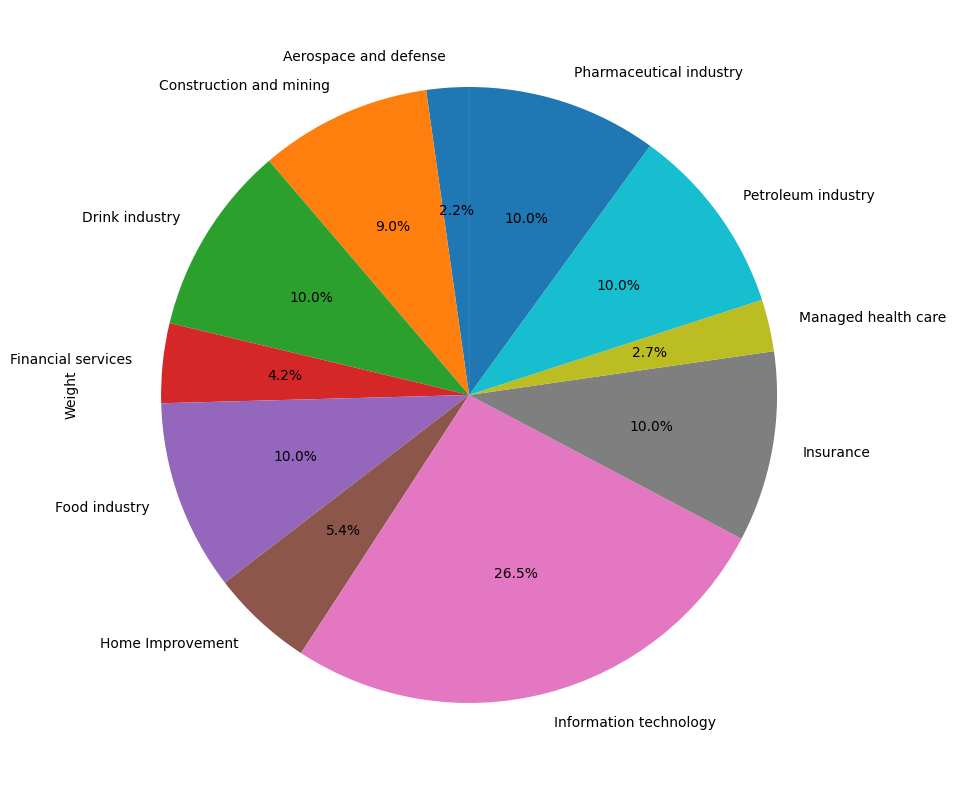

In [3]:
# weights on industry level - bar chart
industry_weights = stock_list.groupby('Industry')['Weight'].sum()
zero_weights = industry_weights[industry_weights == 0]
industry_weights = industry_weights[industry_weights > 0]
industry_weights.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), startangle=90, legend=False)

Zero allocation to the following industries:

In [4]:
zero_weights

Industry
Biopharmaceutical                 0.0
Broadcasting and entertainment    0.0
Clothing industry                 0.0
Conglomerate                      0.0
Fast-moving consumer goods        0.0
Retailing                         0.0
Speciality chemicals              0.0
Telecommunications industry       0.0
Name: Weight, dtype: float64

## Performance metrics

### Download daily price data (Close)

- stock price
- DJIA index

In [5]:
import yfinance as yf
start_date = "2025-01-31"
end_date = "2025-04-11"

# download stock data
stock_data = yf.download(tickers=stock_list["Symbol"].tolist(), start=start_date, end=end_date)  # type: ignore
# print out level 1 column names
stock_data: pd.DataFrame = stock_data["Close"]  # type: ignore
stock_data.iloc[[0, -1], :].T.head(3)  # type: ignore

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  30 of 30 completed


Date,2025-01-31,2025-04-10
Ticker,,
AAPL,235.740814,190.419998
AMGN,283.132568,281.410004
AMZN,237.679993,181.220001


In [6]:
# DJIA index
djia = yf.download('^DJI', start=start_date, end=end_date)  # type: ignore
djia: pd.DataFrame = djia['Close']  # type: ignore
djia.iloc[[0, -1], :].T  # type: ignore


[*********************100%***********************]  1 of 1 completed


Date,2025-01-31,2025-04-10
Ticker,,
^DJI,44544.660156,39593.660156


### Accumulated returns

Text(1, -10.614688006673079, '-11.11%')

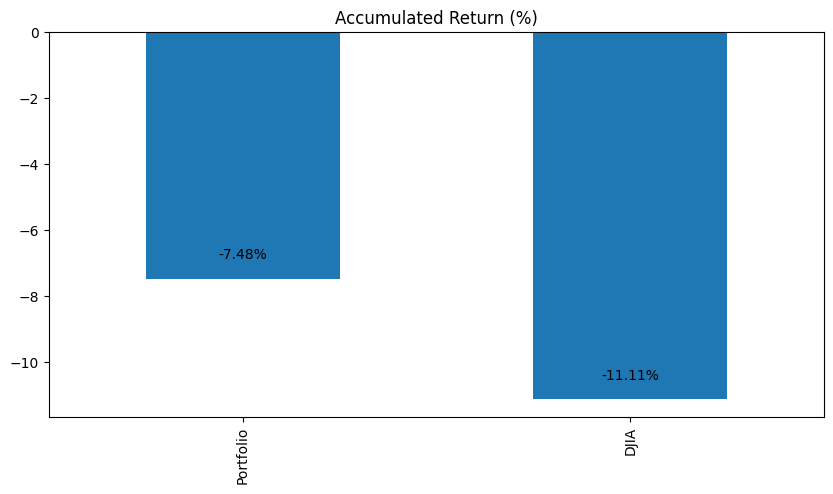

In [7]:
stock_returns = (stock_data.iloc[-1] / stock_data.iloc[0] - 1)
djia_return = (djia.iloc[-1] / djia.iloc[0] - 1)
portfolio_return = (stock_returns * stock_list["Weight"].values).sum()

# show percentage on the plot

accumulated_return = pd.Series({
    "Portfolio": portfolio_return * 100,
    "DJIA": djia_return.values[0] * 100,
}, name="Accumulated Return (%)")

accumulated_return.plot(kind='bar', figsize=(10, 5), title="Accumulated Return (%)")
# show percentage on the plot
import matplotlib.pyplot as plt
plt.text(0, portfolio_return * 100 + 0.5, f"{portfolio_return * 100:.2f}%", ha='center', va='bottom')
plt.text(1, djia_return.values[0] * 100 + 0.5, f"{djia_return.values[0] * 100:.2f}%", ha='center', va='bottom')

Time series plot of accumulated returns

<Axes: title={'center': 'Accumulated Return (%)'}, xlabel='Date'>

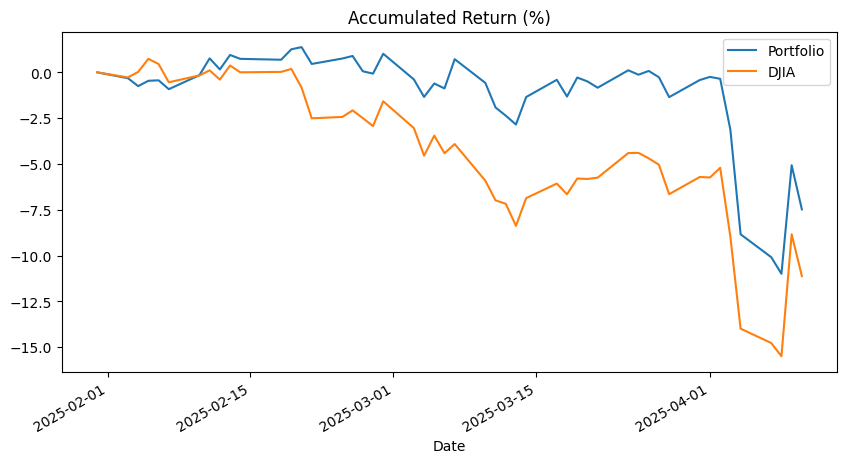

In [10]:
djia_accumulated = djia / djia.iloc[0] - 1
portfolio_accumulated = (stock_data / stock_data.iloc[0] - 1).dot(stock_list["Weight"].values)

# plot accumulated returns
accumulated = pd.concat([portfolio_accumulated * 100, djia_accumulated * 100], axis=1)
accumulated.columns = ["Portfolio", "DJIA"]
accumulated.plot(figsize=(10, 5), title="Accumulated Return (%)", legend=True)

### T test for excess returns

Excess returns (log daily returns) = portfolio returns - DJIA index returns 

In [19]:
import numpy as np
djia_log_returns: pd.DataFrame = np.log(djia / djia.shift(1)).dropna()  # type: ignore
portfolio_log_returns: pd.Series = np.log((portfolio_accumulated + 1) / (portfolio_accumulated + 1).shift(1)).dropna()  # type: ignore

log_returns = pd.concat([portfolio_log_returns, djia_log_returns], axis=1)
log_returns.columns = ["Portfolio", "DJIA"]
log_returns["Excess"] = log_returns["Portfolio"] - log_returns["DJIA"]
log_returns.describe()

,Portfolio,DJIA,Excess
count,48.000000,48.000000,48.000000
mean,-0.001619,-0.002455,0.000836
std,0.015940,0.017634,0.005146
min,-0.060651,-0.056598,-0.011349
25%,-0.008512,-0.009980,-0.002679
50%,-0.002116,-0.002377,-0.000108
75%,0.006079,0.004126,0.004304
max,0.064412,0.075760,0.012249


<Axes: title={'center': 'Excess Log Returns'}, ylabel='Frequency'>

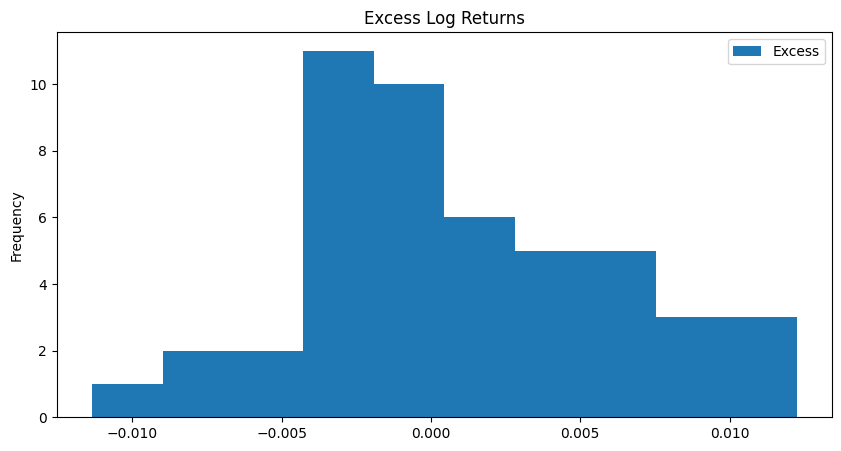

In [21]:
log_returns["Excess"].plot(kind='hist', figsize=(10, 5), title="Excess Log Returns", legend=True)

 t test for excess returns
- Null hypothesis: excess returns = 0
- Alternative hypothesis: excess returns > 0

In [23]:
# t test for excess returns
from scipy import stats
t_stat, p_value = stats.ttest_1samp(log_returns["Excess"][:"2025-04-01"], 0)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 1.93233914994637, P-value: 0.06042113913826879


In [24]:
t_stat, p_value = stats.ttest_1samp(log_returns["Excess"], 0)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 1.1252994625397816, P-value: 0.26617595266769195


In [26]:
log_returns.std()  # type: ignore

Portfolio    0.015940
DJIA         0.017634
Excess       0.005146
dtype: float64